<!-- Minimal helpers (optional, can be reused across cells) -->
<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl"><strong> وارد کردن کتابخانه‌ها (Imports)</strong></h2>
<p class="rtl">
  در این بخش کتابخانه‌های موردنیاز برای <strong>تحلیل داده، کاهش ابعاد، و یادگیری ماشین</strong> بارگذاری می‌شوند.
</p>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>NumPy:</strong> انجام محاسبات عددی و آرایه‌ای.</li>
  <li><strong>Matplotlib:</strong> ترسیم نمودارها و تجسم داده‌ها.</li>
  <li><strong>Scikit-learn:</strong> ابزارهای یادگیری ماشین شامل <strong>PCA، LDA، Logistic Regression، و ابزارهای ارزیابی</strong>.</li>
  <li><strong>StandardScaler:</strong> برای مقیاس‌بندی ویژگی‌ها به میانگین صفر و واریانس یک.</li>
  <li><strong>train_test_split:</strong> تقسیم داده‌ها به بخش‌های آموزش و آزمون.</li>
  <li><strong>accuracy_score:</strong> محاسبهٔ دقت مدل در پیش‌بینی‌ها.</li>
</ul>
<p class="rtl">
  این کتابخانه‌ها زیربنای تمام مراحل بعدی نوت‌بوک را تشکیل می‌دهند.
</p>


In [30]:
# === Imports (add if not already present) ===
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl"><strong> بارگذاری داده و تقسیم به آموزش و آزمون
</strong>
</h2>
<p class="rtl">
  در این بخش داده‌های مجموعهٔ <strong>Digits</strong> از کتابخانهٔ Scikit-learn بارگذاری می‌شود.
  این مجموعه شامل <strong>اعداد دست‌نویس (0 تا 9)</strong> است که هر نمونه به‌صورت یک تصویر 8×8 پیکسلی و
  در قالب یک بردار ۶۴ ویژگی عددی نمایش داده می‌شود.
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>X:</strong> ویژگی‌ها یا ورودی‌ها که همان مقادیر پیکسل‌های تصاویر هستند.</li>
  <li><strong>y:</strong> برچسب هر تصویر (عدد واقعی بین ۰ تا ۹).</li>
  <li><strong>train_test_split:</strong> داده‌ها را با نسبت <strong>۸۰٪ آموزش و ۲۰٪ آزمون</strong> تقسیم می‌کند تا مدل به‌صورت منصفانه ارزیابی شود.</li>
  <li><strong>stratify=y:</strong> اطمینان حاصل می‌کند که نسبت کلاس‌ها در هر دو بخش آموزش و آزمون یکسان باقی بماند.</li>
</ul>

<p class="rtl">
  سپس با استفاده از <strong>StandardScaler</strong>، داده‌ها <strong>استانداردسازی</strong> می‌شوند تا تمام ویژگی‌ها
  میانگین صفر و واریانس یک داشته باشند.
  این مرحله برای الگوریتم‌هایی مانند <strong>PCA</strong> و <strong>Logistic Regression</strong> حیاتی است.
</p>


In [31]:
# === Load Digits dataset and split ===
digits = datasets.load_digits()
X = digits.data            # shape (n_samples, 64)
y = digits.target          # digits 0..9 (10 classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize (fit on train, apply to train & test)
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xte = scaler.transform(X_test)


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl">
<strong>
افزودن نویز گاوسی به داده‌ها
</strong>
</h2>
<p class="rtl">
  برای بررسی پایداری مدل و مقاومت آن در برابر داده‌های آلوده، در این مرحله به تصاویر عددهای دست‌نویس <strong>نویز گاوسی (Gaussian noise)</strong> اضافه می‌شود.
  این کار به مدل کمک می‌کند تا ویژگی‌های اصلی داده را حتی در حضور نویز یاد بگیرد و <strong>توان تعمیم (generalization)</strong> خود را افزایش دهد.
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>noise_std:</strong> میزان شدت نویز را تعیین می‌کند. مقدار کمتر (مثلاً ۱٫۰) نویز ملایم و مقدار بیشتر (۴٫۰) نویز قوی ایجاد می‌کند.</li>
  <li><strong>np.random.RandomState(42):</strong> برای تولید تصادفی کنترل‌شده استفاده می‌شود تا نتایج قابل بازتولید باشند.</li>
  <li><strong>X_train_noisy / X_test_noisy:</strong> نسخه‌های نویزی داده‌های آموزشی و آزمایشی.</li>
  <li><strong>imshow:</strong> برای نمایش نمونه‌هایی از داده‌های نویزی در قالب تصویر ۸×۸ استفاده می‌شود.</li>
  <li><strong>StandardScaler:</strong> پس از افزودن نویز، داده‌ها مجدداً استانداردسازی می‌شوند تا ویژگی‌ها در مقیاس مشابه باقی بمانند.</li>
</ul>

<p class="rtl">
  خروجی این بخش شامل <strong>نمایش تصویری ارقام آلوده به نویز</strong> است که با افزایش مقدار <strong>noise_std</strong>، وضوح آن‌ها کاهش می‌یابد.
</p>


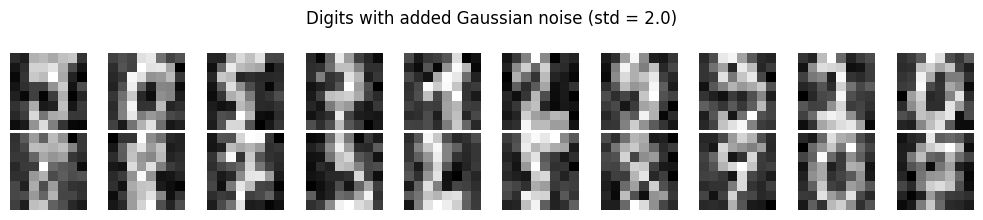

In [32]:
# === Add Gaussian noise to digits data ===

# We’ll control the noise intensity
noise_std = 2.0  # you can try 1.0 (light), 2.0 (medium), 4.0 (strong)

rng = np.random.RandomState(42)
X_train_noisy = X_train + rng.normal(0, noise_std, X_train.shape)
X_test_noisy = X_test + rng.normal(0, noise_std, X_test.shape)

# Visualize a few noisy digits
fig, axes = plt.subplots(2, 10, figsize=(10, 2.2))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_noisy[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
fig.suptitle("Digits with added Gaussian noise (std = %.1f)" % noise_std)
plt.tight_layout()
plt.show()

# Standardize (fit on noisy train only)
scaler_noisy = StandardScaler()
Xtr_noisy = scaler_noisy.fit_transform(X_train_noisy)
Xte_noisy = scaler_noisy.transform(X_test_noisy)


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl">
<strong>
توابع کمکی: ترسیم و ارزیابی مدل
</strong>
</h2>
<p class="rtl">
  در این بخش دو تابع کمکی تعریف می‌شوند تا هم <strong>نمایش دوبعدی داده‌ها</strong> و هم <strong>ارزیابی مدل Logistic Regression</strong> به‌صورت خودکار انجام شود.
  این توابع به ویژه پس از اجرای روش‌های کاهش بُعد مانند <strong>PCA</strong> یا <strong>LDA</strong> برای تفسیر و مقایسهٔ نتایج کاربرد دارند.
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li>
    <strong>plot_2d(Z, y, title):</strong>
    <ul style="padding-right:1.25em">
      <li>داده‌های کاهش‌یافته <strong>Z</strong> را در دو مؤلفهٔ اصلی روی صفحه دوبعدی ترسیم می‌کند.</li>
      <li>رنگ هر نقطه بر اساس <strong>برچسب عددی y</strong> تعیین می‌شود تا تفکیک کلاس‌ها به‌صورت بصری نمایش داده شود.</li>
      <li>نمودار دارای عنوان، برچسب محور و <strong>نوار رنگی (colorbar)</strong> برای راهنمای کلاس‌ها است.</li>
    </ul>
  </li>

  <li>
    <strong>eval_logreg(Ztr, Zte, ytr, yte):</strong>
    <ul style="padding-right:1.25em">
      <li>یک مدل <strong>رگرسیون لجستیک چندکلاسه (multinomial)</strong> با solver="saga" آموزش می‌دهد.</li>
      <li>مدل را روی داده‌های آموزشی <strong>Ztr, ytr</strong> آموزش و روی داده‌های آزمون <strong>Zte, yte</strong> ارزیابی می‌کند.</li>
      <li>مقدار خروجی این تابع <strong>دقت مدل (accuracy score)</strong> است.</li>
    </ul>
  </li>
</ul>

<p class="rtl">
  این توابع برای تکرار آزمایش‌ها در حالت‌های مختلف (مثل داده‌های نویزی یا کاهش‌یافته) بسیار مفید هستند.
</p>


In [33]:
# === Helpers: plot 2D embedding and evaluate with Logistic Regression ===
def plot_2d(Z, y, title):
    plt.figure(figsize=(6.2, 5))
    # color by class label
    plt.scatter(Z[:, 0], Z[:, 1], c=y, s=16, alpha=0.8)
    cbar = plt.colorbar()
    cbar.set_label("digit label")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def eval_logreg(Ztr, Zte, ytr, yte):
    clf = LogisticRegression(
        max_iter=3000, solver="saga", multi_class="multinomial", n_jobs=None, random_state=0
    )
    clf.fit(Ztr, ytr)
    return accuracy_score(yte, clf.predict(Zte))


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  h3.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl">
<strong>
کاهش بُعد با PCA و LDA روی دادهٔ نویزی (۲ مؤلفه)
</strong>
</h2>
<p class="rtl">
  در این بخش دو روش متداول کاهش بُعد یعنی <strong>PCA</strong> و <strong>LDA</strong> را روی داده‌های استانداردشده و نویزی اعمال می‌کنیم
  و نتیجهٔ نگاشت دوبعدی را ترسیم می‌نماییم. علاوه بر این، مقدار <strong>explained_variance_ratio</strong> برای تفسیر میزان اطلاعات
  حفظ‌شده گزارش می‌شود.
</p>

<h3 align="right" class="rtl">PCA چیست و چگونه کار می‌کند؟</h3>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>هدف:</strong> یافتن جهات بیشترین واریانس داده‌ها بدون استفاده از برچسب‌ها (روش غیرنظارتی).</li>
  <li><strong>گام‌ها:</strong>
    <ul style="padding-right:1.25em">
      <li>استانداردسازی داده‌ها (میانگین صفر، واریانس یک) برای جلوگیری از سلطهٔ ویژگی‌های مقیاس بزرگ‌تر.</li>
      <li>محاسبهٔ ماتریس کوواریانس یا استفاده از SVD روی دادهٔ مرکزدهی‌شده.</li>
      <li>محاسبهٔ مقادیر ویژه و بردارهای ویژه؛ <strong>بردارهای ویژه</strong> همان مؤلفه‌های اصلی‌اند.</li>
      <li>مرتب‌سازی مؤلفه‌ها بر اساس واریانس توضیح‌داده‌شده و <strong>فرافکنی</strong> داده‌ها روی نخستین مؤلفه‌ها.</li>
    </ul>
  </li>
  <li><strong>خروجی:</strong> نگاشت داده به فضایی با ابعاد کمتر که بیشترین واریانس را حفظ می‌کند. مقدار <strong>explained_variance_ratio</strong> سهم هر مؤلفه از واریانس کل را نشان می‌دهد.</li>
  <li><strong>نکته:</strong> چون نویز واریانس را افزایش می‌دهد، PCA ممکن است بخشی از انرژی نویز را نیز به‌عنوان واریانس معنی‌دار برداشت کند؛ استانداردسازی و انتخاب مؤلفهٔ مناسب اهمیت دارد.</li>
</ul>

<h3 align="right" class="rtl">LDA چیست و چگونه کار می‌کند؟</h3>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>هدف:</strong> یافتن زیرفضایی نظارتی که <strong>تفکیک‌پذیری کلاس‌ها</strong> را بیشینه کند.</li>
  <li><strong>گام‌ها:</strong>
    <ul style="padding-right:1.25em">
      <li>محاسبهٔ ماتریس پخش درون‌کلاسی <strong>Sw</strong> (پراکندگی نمونه‌ها داخل هر کلاس).</li>
      <li>محاسبهٔ ماتریس پخش بین‌کلاسی <strong>Sb</strong> (پراکندگی مراکز کلاس‌ها نسبت به میانگین کل).</li>
      <li>حل مسألهٔ مقادیر ویژه برای بهینه‌سازی نسبت فیشری: بیشینه‌کردن <strong>trace((Wᵀ Sb W) / (Wᵀ Sw W))</strong>.</li>
      <li>انتخاب بردارهای ویژهٔ برتر (ستون‌های <strong>W</strong>) و <strong>فرافکنی</strong> داده روی آن‌ها.</li>
    </ul>
  </li>
  <li><strong>خروجی:</strong> زیرفضایی که کلاس‌ها را بهتر از هم جدا می‌کند؛ حداکثر تعداد مؤلفه‌ها <strong>تعداد کلاس‌ها منهای ۱</strong> است (برای ارقام ۱۰ کلاسه حداکثر ۹ مؤلفه).</li>
  <li><strong>نکته:</strong> LDA از برچسب‌ها استفاده می‌کند و به‌طور مستقیم تفکیک‌پذیری را هدف می‌گیرد؛ بنابراین معمولاً برای طبقه‌بندی مناسب‌تر از PCA است، به‌ویژه وقتی نویز وجود دارد.</li>
</ul>

<h3 align="right" class="rtl">توضیح کُد این بخش</h3>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>PCA(2):</strong> با <strong>n_components=2</strong> روی دادهٔ نویزی استانداردشده برازش داده می‌شود، سپس نگاشت آموزش و آزمون محاسبه و نسبت واریانس توضیح‌داده‌شده چاپ می‌شود.</li>
  <li><strong>LDA(2):</strong> با <strong>n_components=2</strong> روی دادهٔ نویزی استانداردشده و برچسب‌های آموزش برازش داده می‌شود؛ اگر ویژگی <strong>explained_variance_ratio_</strong> موجود باشد چاپ می‌گردد.</li>
  <li><strong>plot_2d:</strong> نگاشت دوبعدی هر دو روش را با رنگ‌بندی بر اساس برچسب کلاس‌ها نمایش می‌دهد تا تفکیک‌پذیری بصری مقایسه شود.</li>
</ul>

<p class="rtl">
  اگر هدف <strong>تجسم ساختار کلی و واریانس</strong> باشد، PCA مناسب است؛ اگر هدف <strong>بهبود جدایی کلاس‌ها</strong> باشد، LDA معمولاً کاراتر است. در حضور نویز، استانداردسازی و انتخاب درست مؤلفه‌ها نقش کلیدی دارند.
</p>


Noisy PCA(2) explained variance ratio: [0.0922 0.077 ]


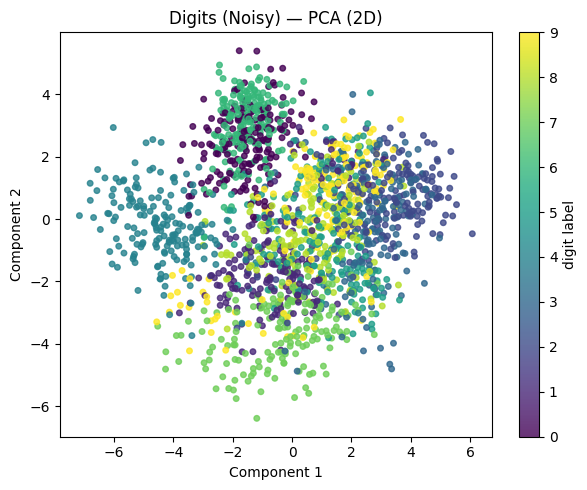

Noisy LDA(2) explained variance ratio: [0.2891 0.1966]


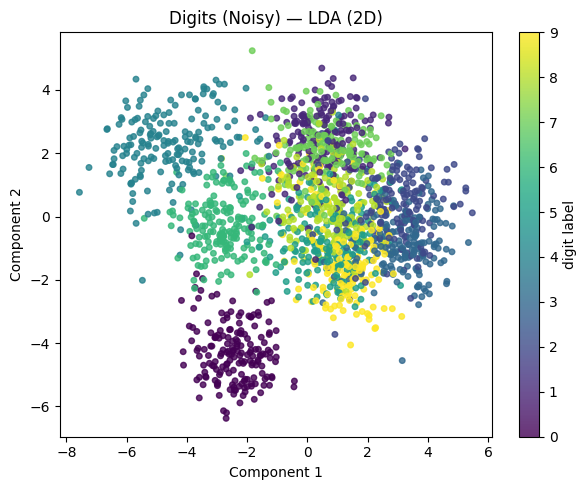

In [34]:
# === PCA(2) and LDA(2) on noisy data ===

# PCA(2)
pca2_noisy = PCA(n_components=2, random_state=0)
Ztr_pca2_noisy = pca2_noisy.fit_transform(Xtr_noisy)
Zte_pca2_noisy = pca2_noisy.transform(Xte_noisy)
print("Noisy PCA(2) explained variance ratio:", np.round(pca2_noisy.explained_variance_ratio_, 4))
plot_2d(np.vstack([Ztr_pca2_noisy, Zte_pca2_noisy]),
        np.hstack([y_train, y_test]), "Digits (Noisy) — PCA (2D)")

# LDA(2)
lda2_noisy = LDA(n_components=2)
Ztr_lda2_noisy = lda2_noisy.fit_transform(Xtr_noisy, y_train)
Zte_lda2_noisy = lda2_noisy.transform(Xte_noisy)
if hasattr(lda2_noisy, "explained_variance_ratio_"):
    print("Noisy LDA(2) explained variance ratio:",
          np.round(lda2_noisy.explained_variance_ratio_, 4))
plot_2d(np.vstack([Ztr_lda2_noisy, Zte_lda2_noisy]),
        np.hstack([y_train, y_test]), "Digits (Noisy) — LDA (2D)")


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl"> 
<strong>
ارزیابی عملکرد Logistic Regression پس از افزودن نویز
</strong>
</h2>
<p class="rtl">
  در این بخش، دقت مدل <strong>رگرسیون لجستیک</strong> پس از اعمال نویز روی داده‌ها و کاهش بُعد با دو روش <strong>PCA(2)</strong> و <strong>LDA(2)</strong> محاسبه و مقایسه می‌شود.
  این مرحله نشان می‌دهد که هر یک از این روش‌ها تا چه حد در حفظ ویژگی‌های مفید داده در شرایط نویزی مؤثر بوده‌اند.
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong><span class = "ltr">eval_logreg(...):</span></strong> تابعی است که مدل Logistic Regression را آموزش داده و دقت پیش‌بینی روی دادهٔ آزمون را برمی‌گرداند.</li>
  <li><strong>acc_pca2_noisy:</strong> دقت مدل پس از کاهش بُعد با <strong>PCA</strong> بر روی داده‌های نویزی.</li>
  <li><strong>acc_lda2_noisy:</strong> دقت مدل پس از کاهش بُعد با <strong>LDA</strong> بر روی همان داده‌ها.</li>
  <li><strong>print:</strong> نمایش عددی دقت‌ها تا چهار رقم اعشار برای مقایسهٔ مستقیم عملکرد دو روش.</li>
</ul>

<p class="rtl">
  معمولاً در داده‌های دارای نویز، <strong>LDA</strong> به‌دلیل ماهیت نظارتی و استفاده از برچسب‌ها، عملکرد بهتری نسبت به <strong>PCA</strong> نشان می‌دهد،
  زیرا مؤلفه‌ها را بر اساس <strong>تفکیک‌پذیری کلاس‌ها</strong> و نه صرفاً بیشترین واریانس انتخاب می‌کند.
</p>

<p class="rtl">
  خروجی این بخش شامل دو مقدار دقت است که می‌تواند برای تحلیل اثر نویز و انتخاب روش بهینهٔ کاهش بُعد استفاده شود.
</p>


In [37]:
# === Logistic Regression performance after noise ===
acc_pca2_noisy = eval_logreg(Ztr_pca2_noisy, Zte_pca2_noisy, y_train, y_test)
acc_lda2_noisy = eval_logreg(Ztr_lda2_noisy, Zte_lda2_noisy, y_train, y_test)

print(f"Accuracy (noisy data) after PCA(2): {acc_pca2_noisy:.4f}")
print(f"Accuracy (noisy data) after LDA(2): {acc_lda2_noisy:.4f}")


Accuracy (noisy data) after PCA(2): 0.4944
Accuracy (noisy data) after LDA(2): 0.6889


c:\Users\Mirhosseini\miniconda3\envs\AI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Mirhosseini\miniconda3\envs\AI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl"> 
<strong>
تحلیل نتایج عملکرد مدل روی داده‌های نویزی
</strong>
</h2>
<p class="rtl">
  پس از افزودن نویز گاوسی و کاهش بُعد داده‌ها با روش‌های <strong>PCA(2)</strong> و <strong>LDA(2)</strong>، دقت مدل Logistic Regression برای هر دو حالت به‌صورت زیر به‌دست آمده است:
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>Accuracy (noisy data) after PCA(2): 0.4944</strong></li>
  <li><strong>Accuracy (noisy data) after LDA(2): 0.6889</strong></li>
</ul>

<h3 align="right" class="rtl"> تفسیر نتایج</h3>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li>
    مقدار دقت در حالت <strong>PCA(2)</strong> تنها حدود <strong>۴۹٪</strong> است، که نشان می‌دهد 
    پس از افزودن نویز، مؤلفه‌های اصلی استخراج‌شده توسط PCA نتوانسته‌اند ویژگی‌های تمایزدهندهٔ ارقام را به‌خوبی حفظ کنند.
    دلیل اصلی آن است که <strong>PCA</strong> صرفاً بر اساس بیشترین واریانس داده عمل می‌کند،
    و در داده‌های نویزی، بخشی از این واریانس در واقع از نویز ناشی می‌شود نه از ویژگی‌های معنادار.
  </li>

  <li>
    در مقابل، دقت <strong>LDA(2)</strong> حدود <strong>۶۹٪</strong> به‌دست آمده که به‌طور قابل‌توجهی بالاتر است.
    این تفاوت نشان می‌دهد که <strong>LDA</strong> به‌دلیل استفاده از اطلاعات برچسب‌ها (کلاس‌ها)،
    می‌تواند حتی در حضور نویز، زیرفضایی را بیابد که کلاس‌های مختلف (اعداد ۰ تا ۹) را از هم بهتر جدا کند.
  </li>

  <li>
    به‌عبارت دیگر، <strong>LDA نسبت به نویز مقاوم‌تر</strong> است زیرا بر مبنای تفکیک‌پذیری بین کلاس‌ها بهینه‌سازی می‌شود،
    در حالی که <strong>PCA</strong> فقط ساختار آماری کلی داده را در نظر می‌گیرد و در شرایط نویزی دچار افت عملکرد می‌شود.
  </li>
</ul>

<p class="rtl">
  نتیجهٔ کلی آن است که برای داده‌های دارای برچسب و به‌ویژه در شرایط نویز، 
  استفاده از <strong>LDA</strong> نسبت به <strong>PCA</strong> برای حفظ اطلاعات مفید و بهبود عملکرد مدل طبقه‌بندی مناسب‌تر است.
</p>


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl">
<strong>
مقایسهٔ عملکرد PCA(50) و LDA(9) روی داده‌های نویزی
</strong>
</h2>
<p class="rtl">
  در این مرحله، تعداد مؤلفه‌های انتخاب‌شده برای کاهش بُعد افزایش یافته است تا بررسی شود که
  آیا افزودن مؤلفه‌های بیشتر (در PCA) یا استفادهٔ کامل از ظرفیت LDA (۹ مؤلفه برای ۱۰ کلاس)
  می‌تواند عملکرد مدل را در داده‌های نویزی بهبود دهد یا خیر.
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li>
    <strong>PCA(50):</strong> از میان ۶۴ ویژگی اصلی، ۵۰ مؤلفهٔ اول انتخاب می‌شوند که بیشترین واریانس داده را حفظ می‌کنند.
    هدف این است که بخش زیادی از اطلاعات (و متأسفانه بخشی از نویز) نگه‌داری شود.
  </li>
  <li>
    <strong>LDA(9):</strong> چون مجموعه دادهٔ ارقام شامل ۱۰ کلاس است، حداکثر تعداد مؤلفه‌های قابل استخراج در LDA برابر با ۹ است.
    این مؤلفه‌ها به‌طور مستقیم تفکیک کلاس‌ها را بیشینه می‌کنند.
  </li>
  <li>
    <strong>eval_logreg:</strong> مجدداً از تابع ارزیابی برای محاسبهٔ دقت Logistic Regression روی داده‌های کاهش‌یافته استفاده می‌شود.
  </li>
</ul>


In [36]:
# PCA(50) vs LDA(9) on noisy data
pca50_noisy = PCA(n_components=50, random_state=0)
Ztr_pca50_noisy = pca50_noisy.fit_transform(Xtr_noisy)
Zte_pca50_noisy = pca50_noisy.transform(Xte_noisy)
acc_pca50_noisy = eval_logreg(Ztr_pca50_noisy, Zte_pca50_noisy, y_train, y_test)

lda9_noisy = LDA(n_components=9)
Ztr_lda9_noisy = lda9_noisy.fit_transform(Xtr_noisy, y_train)
Zte_lda9_noisy = lda9_noisy.transform(Xte_noisy)
acc_lda9_noisy = eval_logreg(Ztr_lda9_noisy, Zte_lda9_noisy, y_train, y_test)

print(f"Accuracy (noisy data) after PCA(50): {acc_pca50_noisy:.4f}")
print(f"Accuracy (noisy data) after LDA(9):  {acc_lda9_noisy:.4f}")


c:\Users\Mirhosseini\miniconda3\envs\AI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Mirhosseini\miniconda3\envs\AI\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (noisy data) after PCA(50): 0.9333
Accuracy (noisy data) after LDA(9):  0.9417


<style>
  .rtl {
    direction: rtl;
    text-align: justify;
    line-height: 200%;
    font-family: "Vazir", sans-serif;
    color: #fff; /* white text */
  }
  .ltr {
    direction: ltr;
    unicode-bidi: isolate;
  }
  h2.rtl {
    color: #32CD32;
  }
  h3.rtl {
    color: #32CD32;
  }
  strong {
    color: #32CD32; /* light pink highlights */
  }
</style>

<h2 align="right" class="rtl"> 
<strong>
تحلیل نتایج: چرا دقت‌های PCA(50) و LDA(9) نزدیک به‌هم شده‌اند؟
</strong>
</h2>
<p class="rtl">
  نتایج به‌دست‌آمده نشان می‌دهد که هر دو روش کاهش بُعد در داده‌های نویزی عملکرد تقریباً مشابهی دارند:
</p>

<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li><strong>Accuracy (noisy data) after PCA(50): 0.9333</strong></li>
  <li><strong>Accuracy (noisy data) after LDA(9): 0.9417</strong></li>
</ul>

<h3 align="right" class="rtl"> تفسیر نتایج</h3>
<ul dir="rtl" class="rtl" style="padding-right:1.25em">
  <li>
    در حالت <strong>PCA(50)</strong>، تعداد مؤلفه‌ها زیاد است (۵۰ از ۶۴ ویژگی اصلی)،
    بنابراین تقریباً تمام اطلاعات مفید داده حفظ شده است.
    در این سطح از ابعاد، تأثیر نویز نسبت به اطلاعات واقعی کمتر می‌شود
    و فضای کاهش‌یافته تقریباً همان ویژگی‌های تفکیک‌کننده را حفظ می‌کند.
  </li>

  <li>
    در <strong>LDA(9)</strong> نیز، چون از تمام ۹ مؤلفهٔ ممکن (برای ۱۰ کلاس) استفاده شده است،
    مدل می‌تواند تمام ابعاد لازم برای تفکیک کلاس‌ها را پوشش دهد.
    بنابراین LDA به سقف توانایی خود در تفکیک داده‌ها رسیده است.
  </li>

  <li>
    هر دو روش با این تنظیمات بخش عمده‌ای از ساختار اصلی داده را بازنمایی می‌کنند؛
    به همین دلیل اختلاف دقت نهایی آن‌ها بسیار ناچیز (حدود ۱٪) است.
  </li>

  <li>
    در واقع، وقتی <strong>تعداد مؤلفه‌های PCA کافی باشد</strong>،
    این روش می‌تواند ساختاری مشابه LDA در فضای ویژگی‌ها به‌دست آورد،
    به‌ویژه اگر نویز کنترل‌شده و داده‌ها به‌خوبی نرمال‌سازی شده باشند.
  </li>
</ul>

<p class="rtl">
  به‌طور خلاصه، نزدیکی دقت‌ها نشان می‌دهد که در شرایطی که:
  <strong>۱)</strong> داده‌ها استانداردشده‌اند، 
  <strong>۲)</strong> تعداد مؤلفه‌های PCA زیاد است،
  و <strong>۳)</strong> نویز متوسط است،
  هر دو روش می‌توانند بازنمایی‌های بسیار مشابهی از داده ایجاد کنند،
  به‌گونه‌ای که مدل نهایی (Logistic Regression) تقریباً به دقت یکسانی دست یابد.
</p>
